# Machine Learning Project (ML-2025): Heart Disease Risk Prediction

Data & AI ( DIA 4 )

Author : Nassim LOUDIYI, Paul-Adrien LU-YEN-TUNG 

Objective: Predict the presence of heart disease using classification models and SHAP interpretability.

### Target Variable

The target represents the presence of diagnosed heart disease:

| Value | Meaning |
|-------|---------|
| `0` | No heart disease |
| `1` | Presence of heart disease |

This formulation makes the problem a **binary supervised classification task**.

---

### Feature Dictionary

The table below summarizes the 13 input features, their medical meaning, and their data types.

| Feature | Description | Type |
|---------|-------------|------|
| **`age`** | Patient age in years | Continuous |
| **`gender`** | Sex (1 = Male, 0 = Female) | Binary categorical |
| **`chestpain`** | Chest pain type: 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic | Multi-class categorical |
| **`restingBP`** | Resting blood pressure (mm Hg) | Continuous |
| **`serumcholestrol`** | Serum cholesterol concentration (mg/dl) | Continuous |
| **`fastingbloodsugar`** | Fasting blood sugar > 120 mg/dl (1 = True, 0 = False) | Binary |
| **`restingelectro`** | Resting electrocardiogram results: 0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy | Multi-class categorical |
| **`maxheartrate`** | Maximum heart rate achieved during exercise | Continuous |
| **`exerciseangia`** | Exercise-induced angina (1 = Yes, 0 = No) | Binary |
| **`oldpeak`** | ST depression induced by exercise relative to rest | Continuous |
| **`slope`** | Slope of the ST segment: 1 = upsloping, 2 = flat, 3 = downsloping | Multi-class categorical |
| **`noofmajorvessels`** | Number of major blood vessels (0–3) visualized using fluoroscopy | Discrete categorical |
| **`target`** | Diagnosis result (0 = No heart disease, 1 = Heart disease) | Target |

### **Step 1 — Data Exploration, Data Quality Checks, Preprocessing & Baseline**

This first step aims to understand the dataset, detect data quality issues, and build a strong initial baseline model.

#### **1. Data Quality & Exploration**
- Dataset structure and feature definitions  
- Statistical summary  
- Missing value inspection (none detected)  
- Duplicate detection  
- Outlier inspection using boxplots  
- Class imbalance analysis  
- Correlation matrix and heatmap  
- Exploratory data visualizations (histograms, countplots, boxplots)

#### **2. Preprocessing Pipeline**

A robust preprocessing pipeline is implemented to standardize data preparation before model training:

- **OneHotEncoding** for categorical variables  
- **Standard Scaling** for numerical variables  
- Explicit separation of feature types  
- **Stratified train–test split** to preserve target distribution  
- End-to-end preprocessing using **ColumnTransformer + Pipeline**  

Additionally, a **PCA-based visualization** (2D and 3D projections) was performed on the transformed training set.  
This PCA step is **not used for model training**; its sole purpose is exploratory: to assess the intrinsic structure of the dataset, analyze variance distribution, and evaluate the linear separability of the classes.

This guarantees that all models receive reproducible and correctly transformed data, while the PCA visualization provides valuable insights into the complexity of the problem without influencing the predictive pipeline.


#### **3. Baseline Models**
To establish a reference performance:
- **DummyClassifier** (majority-class baseline)  
- **Logistic Regression** (interpretable baseline model)  

Evaluation metrics: **Accuracy, Precision, Recall, F1-score, ROC-AUC**.

This ensures all later models significantly outperform the baseline.


### 1.1. Data Loading & Initial Inspection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

sns.set(style="whitegrid")

df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe().T)

Shape: 1000 rows × 14 columns


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


### 1.2. Data Quality Checks

In [2]:
print("\n=== Missing Values ===")
print(df.isna().sum())
print(f"Total missing values: {df.isna().sum().sum()}")

print("\n=== Duplicate Rows ===")
print(f"Total duplicated rows: {df.duplicated().sum()}")


=== Missing Values ===
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
Total missing values: 0

=== Duplicate Rows ===
Total duplicated rows: 0


#### 1.3. Target Distribution (Class Imbalance)


=== Target Distribution ===


,Count,Percent
target,,
0,420,42.0
1,580,58.0


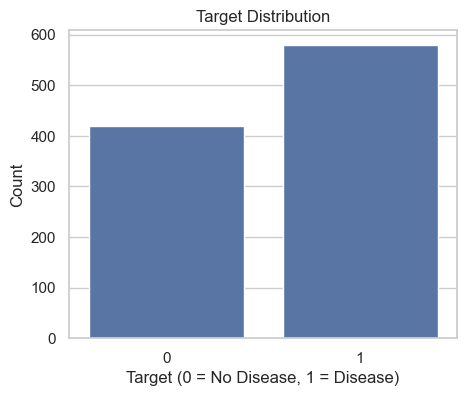

In [3]:
target_counts = df["target"].value_counts().sort_index()
target_percent = target_counts / len(df) * 100

target_df = pd.DataFrame({
    "Count": target_counts,
    "Percent": target_percent.round(2)
})

print("\n=== Target Distribution ===")
display(target_df)

plt.figure(figsize=(5,4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

#### 1.4. Exploratory Data Analysis (EDA) 

In [4]:
continuous_features = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
categorical_features = ["gender", "chestpain", "fastingbloodsugar", "restingrelectro", "exerciseangia", "slope", "noofmajorvessels"]

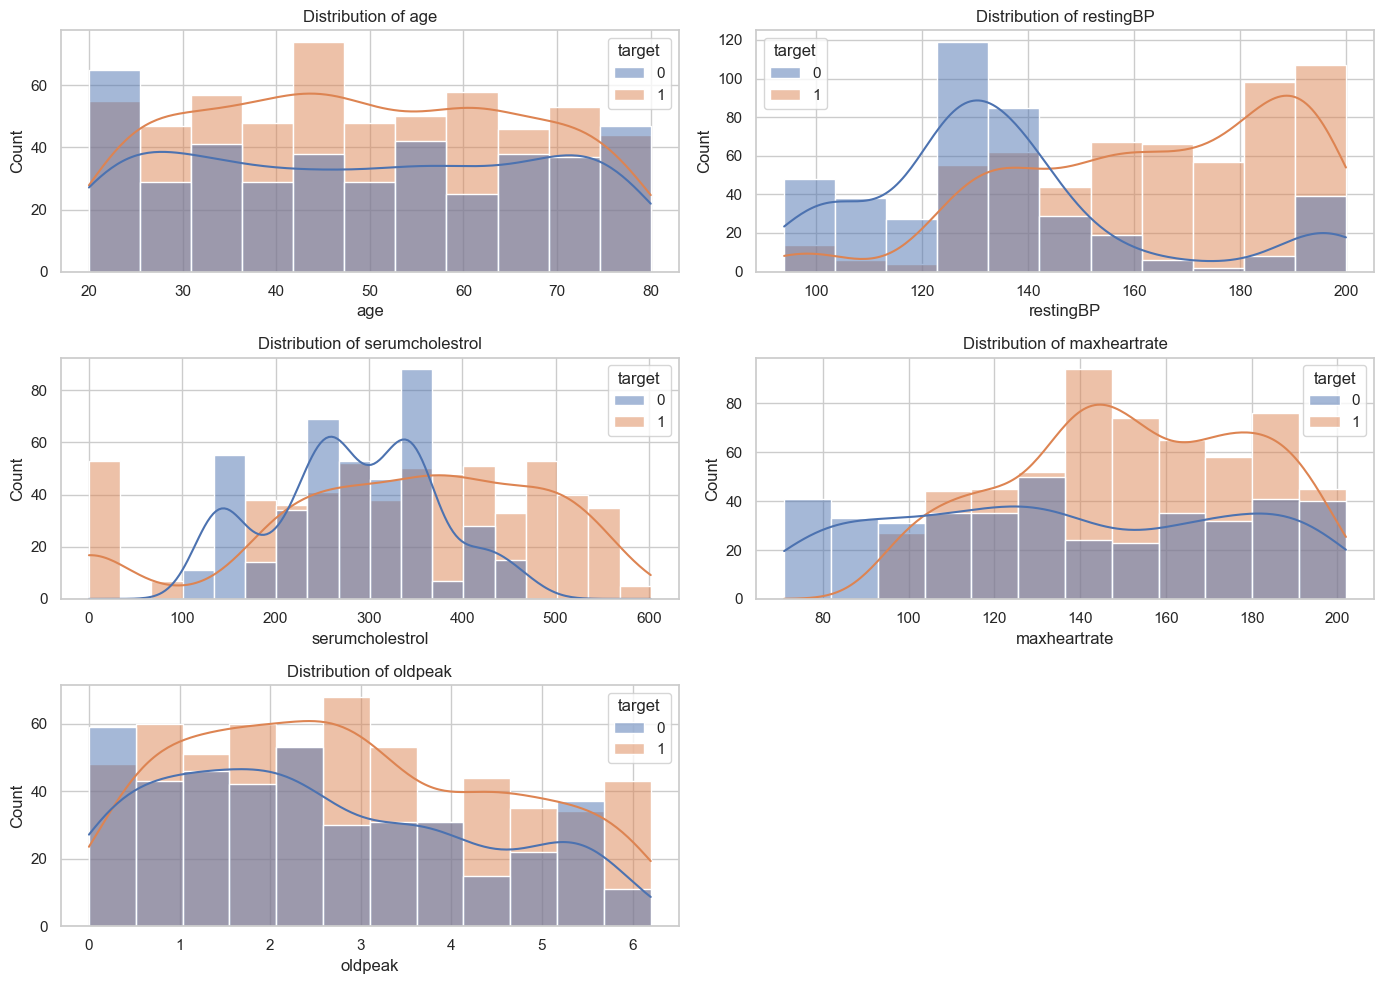

In [5]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df, x=col, hue="target", kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Interpretation :**
These distributions show noticeable differences between patients with and without heart disease across several continuous variables. Overall, patients with heart disease tend to present higher maxheartrate values, which reflects an abnormal cardiac response during stress testing rather than better cardiovascular fitness. We also observe higher values of restingBP, serumcholestrol, and oldpeak among affected patients, consistent with well-known cardiovascular risk factors.
In contrast, age does not appear to strongly separate the two groups, as both distributions overlap substantially.

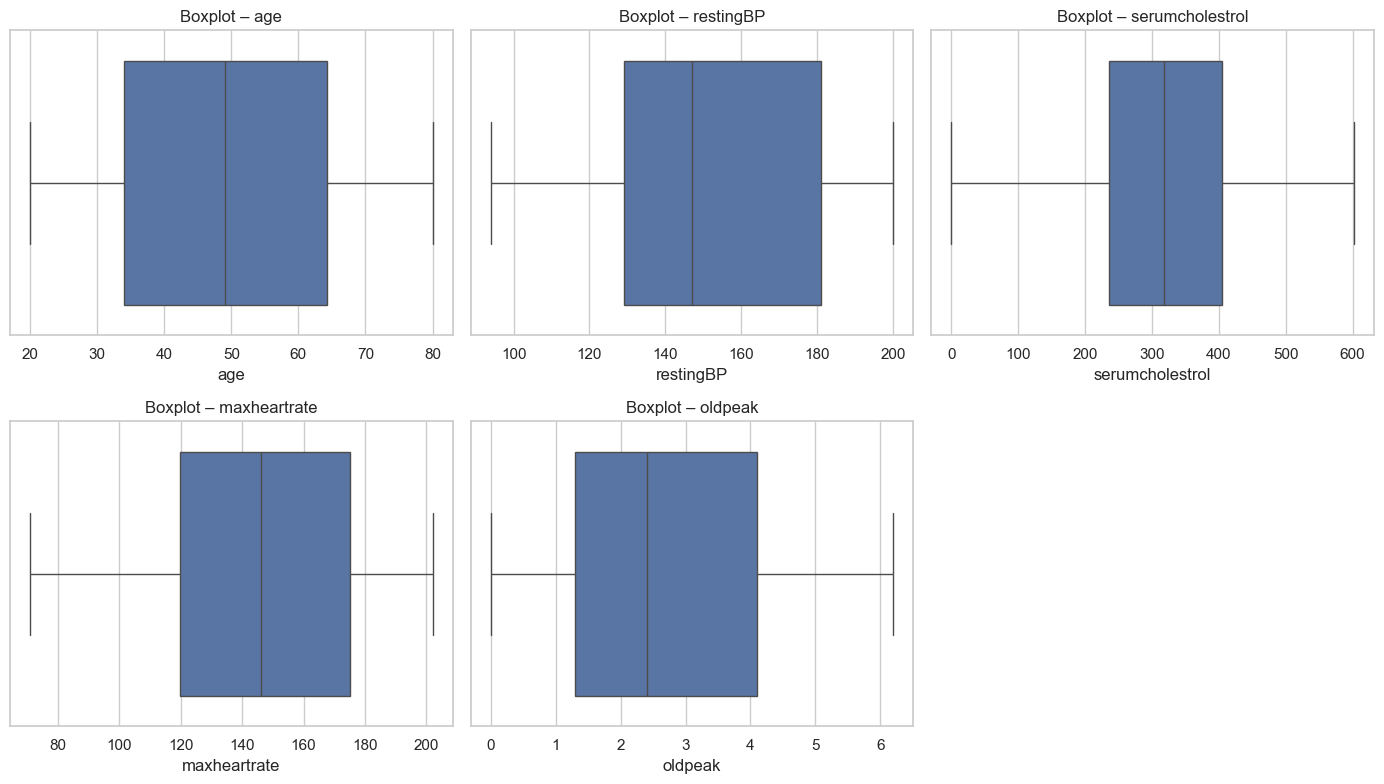

In [6]:
plt.figure(figsize=(14,8))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
plt.tight_layout()
plt.show()

**Interpretation :**
These boxplots show the overall distribution of the five continuous features in the dataset. Most variables have a moderate spread, with restingBP and oldpeak appearing slightly more variable than the others, as suggested by their wider boxes and longer whiskers. Age and maxheartrate look more compact and symmetrically distributed around their median.

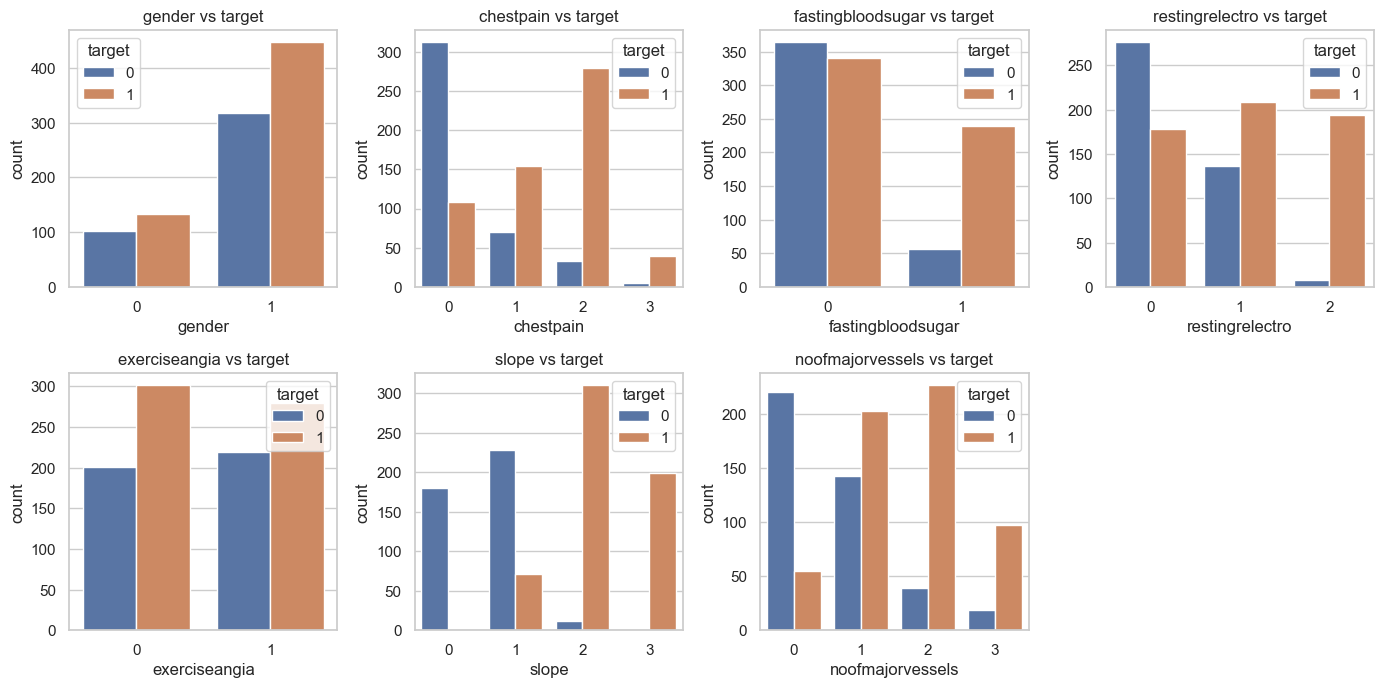

In [7]:
plt.figure(figsize=(14,10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=col, hue="target")
    plt.title(f"{col} vs target")
plt.tight_layout()
plt.show()

**Interpretation :**
These barplots highlight how categorical features differ between patients with and without heart disease. The gender distribution shows that a higher proportion of male patients (gender = 1) are diagnosed with heart disease. The chestpain feature is particularly informative: patients with atypical angina or non-anginal pain (types 2 and 3) appear more frequently in the diseased group, while typical angina (type 0) is more common among non-diseased patients.

For Fasting blood sugar, while most patients fall into the “fbs = 0” category, the subset with fbs = 1 is highly dominated by patients with heart disease. This indicates that elevated fasting glucose (≥120 mg/dl) is strongly associated with the presence of heart disease in this dataset, making fbs a potentially useful discriminative feature. Likewise, the resting electrocardiogram categories show some differences, with category 2 appearing more frequently in the diseased population.

Exercise-induced angina (exerciseangia) does not seem very discriminative, which suggests that this feature alone may not behave intuitively and could require interaction with other variables. The slope feature is more clearly discriminative, with slope = 2 being much more common among patients with heart disease.

Finally, the number of major vessels is highly informative: patients with 2 or 3 visible vessels have a much higher prevalence of heart disease, while lower vessel counts appear more often in the non-diseased group.

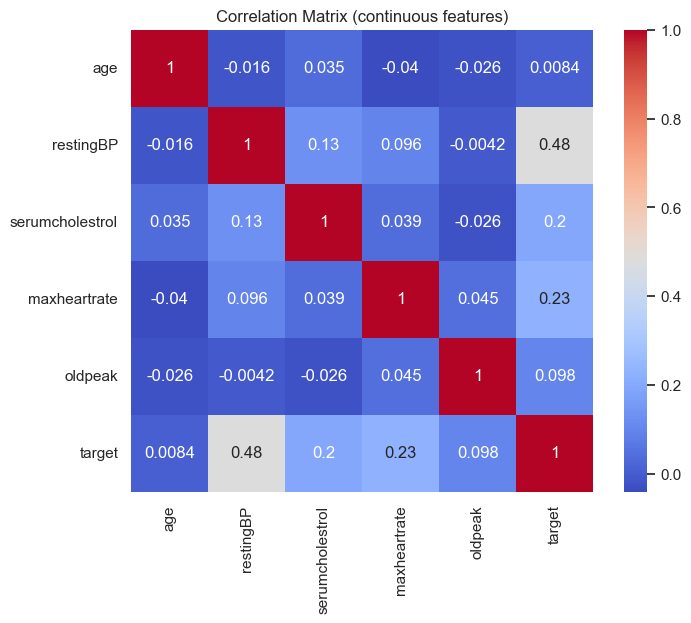

In [8]:
plt.figure(figsize=(8,6))
corr = df[continuous_features + ["target"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix (continuous features)")
plt.show()

**Interpretation :**
This correlation matrix shows that the continuous features in the dataset have generally weak relationships with each other, as most correlation values are close to zero. The strongest association with the target variable is observed for restingBP (≈ 0.48), indicating a moderate positive correlation. Maxheartrate and serumcholestrol also show small positive correlations with the target (≈ 0.23 and 0.20 respectively), while age and oldpeak have almost no linear relationship with the target.

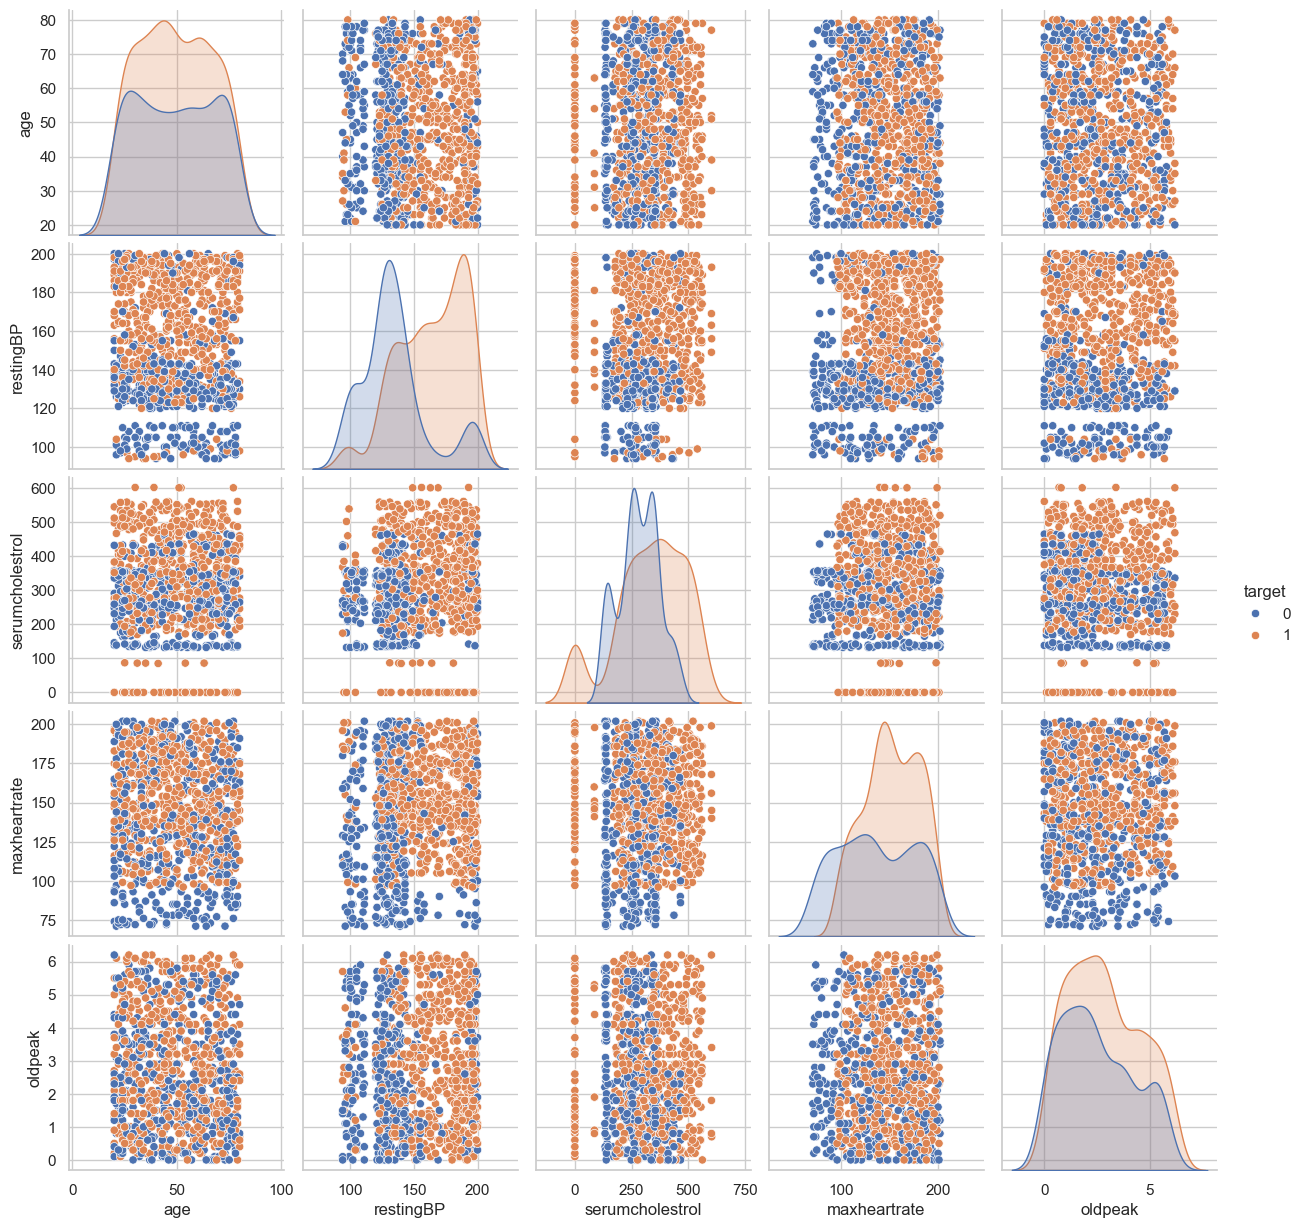

In [9]:
sns.pairplot(df, vars=continuous_features, hue="target")
plt.show()

**Interpretation :**
This pairplot illustrates the relationships between continuous features and how they differ across the two target classes. Overall, the scatterplots show a high degree of overlap between patients with and without heart disease, indicating weak linear separability. None of the feature pairs form clusters that clearly distinguish the two groups.

On the diagonal KDE plots, restingBP and maxheartrate show the most noticeable differences between the two targets, with slightly shifted distributions. However, the other features—age, serumcholesterol, and oldpeak—display substantial overlap, suggesting limited discriminative power based solely on their distributions

### 1.5. Train–Test Split

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 13)
Test shape: (200, 13)


### 1.6. Preprocessing pipeline

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_onehot = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

sample = preprocessor_onehot.fit_transform(X_train.head(3))
print("Transformation OK — sample shape:", sample.shape)

Transformation OK — sample shape: (3, 20)


### 1.7. PCA Visualisation

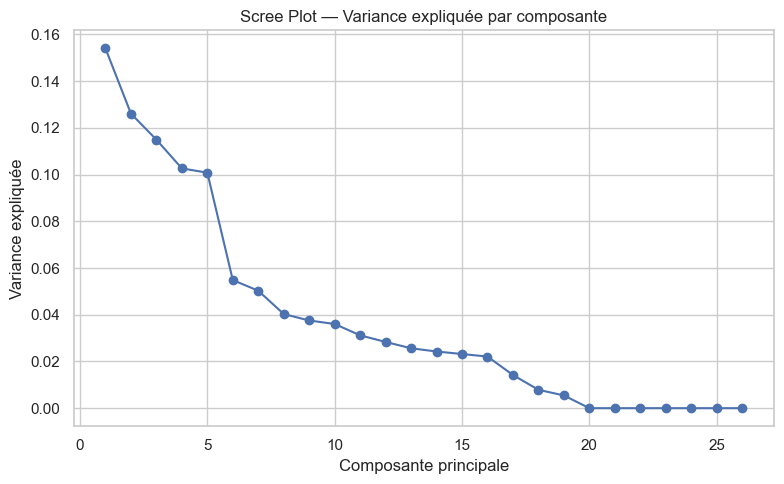

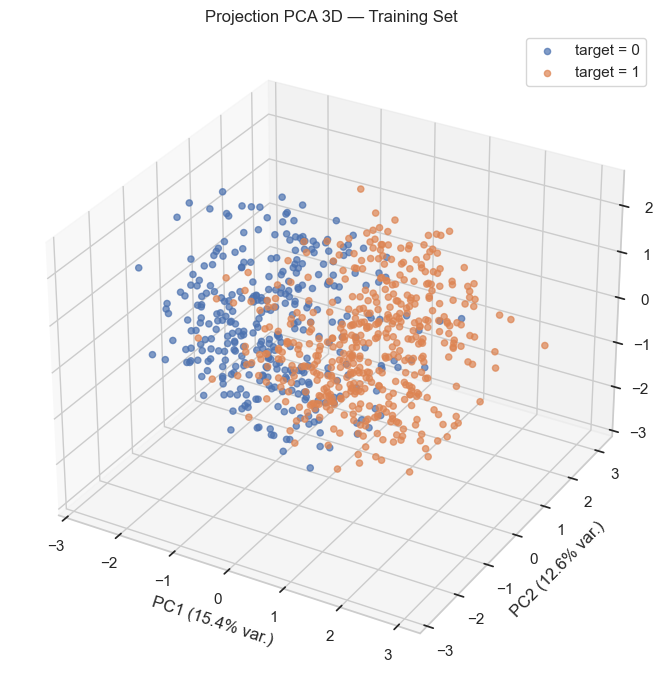

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour le 3D
import seaborn as sns
import numpy as np

# 1. Transformation du training set avec ton préprocesseur
X_train_processed = preprocessor_onehot.fit_transform(X_train)

# 2. PCA en 3 composantes
pca_3d = PCA(n_components=3, random_state=42)
X_train_pca3 = pca_3d.fit_transform(X_train_processed)

# 3. Scree plot (optionnel mais utile)
pca_full = PCA().fit(X_train_processed)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o")
plt.title("Scree Plot — Variance expliquée par composante")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Visualisation 3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

targets = np.unique(y_train)
colors = sns.color_palette("coolwarm", n_colors=len(targets))

for target, color in zip(targets, colors):
    idx = (y_train.values == target)
    ax.scatter(
        X_train_pca3[idx, 0],
        X_train_pca3[idx, 1],
        X_train_pca3[idx, 2],
        label=f"target = {target}",
        alpha=0.7
    )

ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}% var.)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}% var.)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}% var.)")
ax.set_title("Projection PCA 3D — Training Set")
ax.legend()
plt.tight_layout()
plt.show()


### Interpretation of the Scree Plot and 3D PCA Projection

The scree plot shows that the first principal components explain only a moderate amount of variance, with approximately **15% for PC1** and **12% for PC2**, followed by a gradual decline. This indicates that no single component dominates the structure of the dataset and that the information is **spread across many dimensions**. After the sixth component, each additional axis contributes less than 5% of variance, suggesting that strong dimensionality reduction would lead to a significant **loss of information**.

The 3D PCA projection using PC1–PC2–PC3 confirms this multidimensional structure. The two classes (target = 0 and target = 1) appear **heavily intertwined**, with no clear visual separation between them. This behavior is expected, since PCA is an **unsupervised** method that maximizes variance rather than class separability. The substantial overlap implies that the decision boundary in this problem is likely **non-linear** and depends on a combination of multiple features rather than a few dominant directions.

**Overall**, the PCA analysis highlights that:
- the dataset does not exhibit simple or linearly separable structure,
- the classes overlap strongly in the reduced space,
- and dimensionality reduction is not suitable for improving predictive performance, but remains useful for **visualizing the intrinsic complexity** of the problem.


### 1.8. Baseline Models

### 🔎 Baseline Model: Dummy Classifier  
To establish a reliable performance baseline, we include a **Dummy Classifier**, a model that makes predictions without learning any relationship from the data. Depending on the chosen strategy (e.g., `most_frequent`, `prior`, or `stratified`), it generates predictions based solely on simple heuristics.  

Using such a baseline is a standard practice in machine learning, as it allows us to verify that more advanced models provide **meaningful improvements** over trivial decision rules.  

**Reference:**  
Scikit-Learn Developers (2024). *DummyClassifier — Simple baseline classifier.*  
Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators


In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = Pipeline(steps=[
    ("preprocess", preprocessor_onehot),
    ("clf", DummyClassifier(strategy="most_frequent"))
])

dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

### 🔎 Logistic Regression  
Logistic Regression is a classical **generalized linear model** widely used for binary classification problems.  
It models the probability of the positive class using a logistic (sigmoid) function applied to a linear combination of input features.  
Its strengths include interpretability, low computational cost, and strong performance when the decision boundary is approximately linear.  

Logistic Regression is grounded in solid statistical foundations and is one of the most studied and validated predictive models in biomedical research and epidemiology.  

**Reference:**  
Hosmer, D.W., Lemeshow, S., & Sturdivant, R.X. (2013). *Applied Logistic Regression* (3rd ed.). Wiley.  
A classic textbook establishing logistic regression as a standard method for binary outcome modeling.


In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline(steps=[
    ("preprocess", preprocessor_onehot),
    ("clf", LogisticRegression(max_iter=2000, class_weight='balanced'))
])


lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
y_proba_lr = lr_clf.predict_proba(X_test)[:,1]

### 1.9. Evaluation Function + Results


=== DummyClassifier ===
Accuracy: 0.58
Precision: 0.58
Recall: 1.0
F1-score: 0.7341772151898734


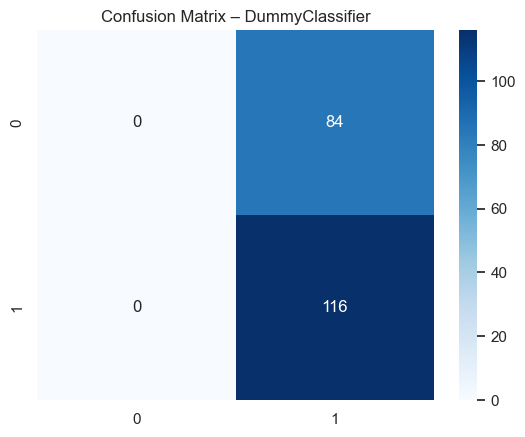


=== Logistic Regression ===
Accuracy: 0.98
Precision: 0.9827586206896551
Recall: 0.9827586206896551
F1-score: 0.9827586206896551
ROC-AUC: 0.9973316912972084


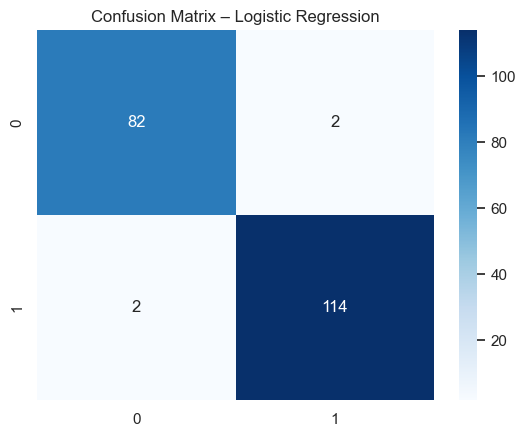

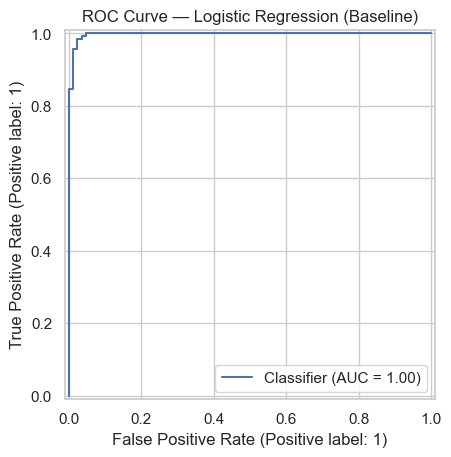

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.show()

evaluate("DummyClassifier", y_test, y_pred_dummy)


evaluate("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

# ROC Curve for Logistic Regression (Baseline)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("ROC Curve — Logistic Regression (Baseline)")
plt.grid(True)
plt.show()

### Baseline Analysis

The DummyClassifier performs extremely poorly, as expected for a baseline model. It predicts only the majority class, leading to 0 true negatives and 0 false negatives, with every prediction classified as “1”. This results in high recall (1.0) but very low precision and accuracy (0.58), demonstrating that the model provides no real predictive value. The confusion matrix confirms its inability to distinguish between the two classes.

In contrast, the Logistic Regression model achieves excellent performance across all metrics. With an accuracy of 0.98 and equally strong precision, recall, and F1-score, it demonstrates a very high ability to correctly classify both positive and negative cases. The confusion matrix shows only 4 misclassifications out of nearly 200 observations, highlighting its robustness and balance between sensitivity and specificity.

Finally, the ROC curve further confirms the strong performance of Logistic Regression, with an AUC close to 1.00, indicating near-perfect discrimination between the two classes. Such results suggest that the model is highly effective for this dataset and significantly outperforms the baseline classifier.
- - -